# Lab 3 - Visualization

Last update: 01/11/2023

- Name: Đoàn Đức Hữu
- Student ID: 21120465

---


## Work and submission guidelines

**Work on your assignment**

- You will do your assignment directly in this notebook. First, fill in your name and ID at the beginning of the file. In the notebook, fill in places that say:

```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:**

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
  - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
  - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---


In [1]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
#!pip install geopandas
import geopandas as gpd

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer when I was a senior student
- Link: https://www.worldometers.info/coronavirus/


In [2]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:

  - Country Name: The name of the country for the reported data.
  - Total Cases: The total number of confirmed COVID-19 cases in tbe country.
  - New Cases: The number of new confirmed COVID-19 cases in the country.
  - Total Deaths: The total number of deaths due to COVID-19 in the country.
  - New Deaths: The number of new deaths due to COVID-19 in the country.
  - Total Recovered: The total number of recovries from COVID-19 in the country.
  - Active Cases: The current number of active COVID-19 cases in the country.
  - Critical Cases: The number or critical condition COVID-19 cases in the country.
  - Total Tests: The total number of COVID-19 tests conducted in the country.
  - Population: The total population of the country

- Check the data with `info()` function


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.


In [4]:


# Drop the columns with a lot of missing data
df = df.drop(['New Cases', 'New Deaths', 'Critical Cases'], axis=1)

# Convert to integer
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Country Name':
        df[col] = df[col].str.replace(',', '')
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate the median of each column
median_recovered = df['Total Recovered'].median()
median_active = df['Active Cases'].median()
median_tests = df['Total Tests'].median()

# Fill in missing values with the median
df['Total Recovered'].fillna(median_recovered, inplace=True)
df['Active Cases'].fillna(median_active, inplace=True)
df['Total Tests'].fillna(median_tests, inplace=True)

In [5]:

# raise NotImplementedError('not implemented')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

Because the code only fills missing values in three columns.

...


In [6]:
# TODO: fill in the missing data with median value
# Convert columns to numeric and fill missing values

median_total_deaths = df['Total Deaths'].median()
df['Total Deaths'].fillna(median_total_deaths, inplace=True)


# raise NotImplementedError('not implemented')

missing_values = df.isnull().sum()

print(missing_values)

# check the result
df.info()

Country Name       0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Tests        0
Population         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: Why do we have `float64` here?

This could be because these columns had NaN values before we filled them with the median. Even after filling the NaN values, the data type of the column remains as float.


In [7]:
# TODO: save your new data frame to `./data/new_data.csv`
df.to_csv('./data/new_data.csv', index=False)
# raise NotImplementedError('not implemented')

In [8]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries


In [9]:
# # un-comment these lines of code
df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


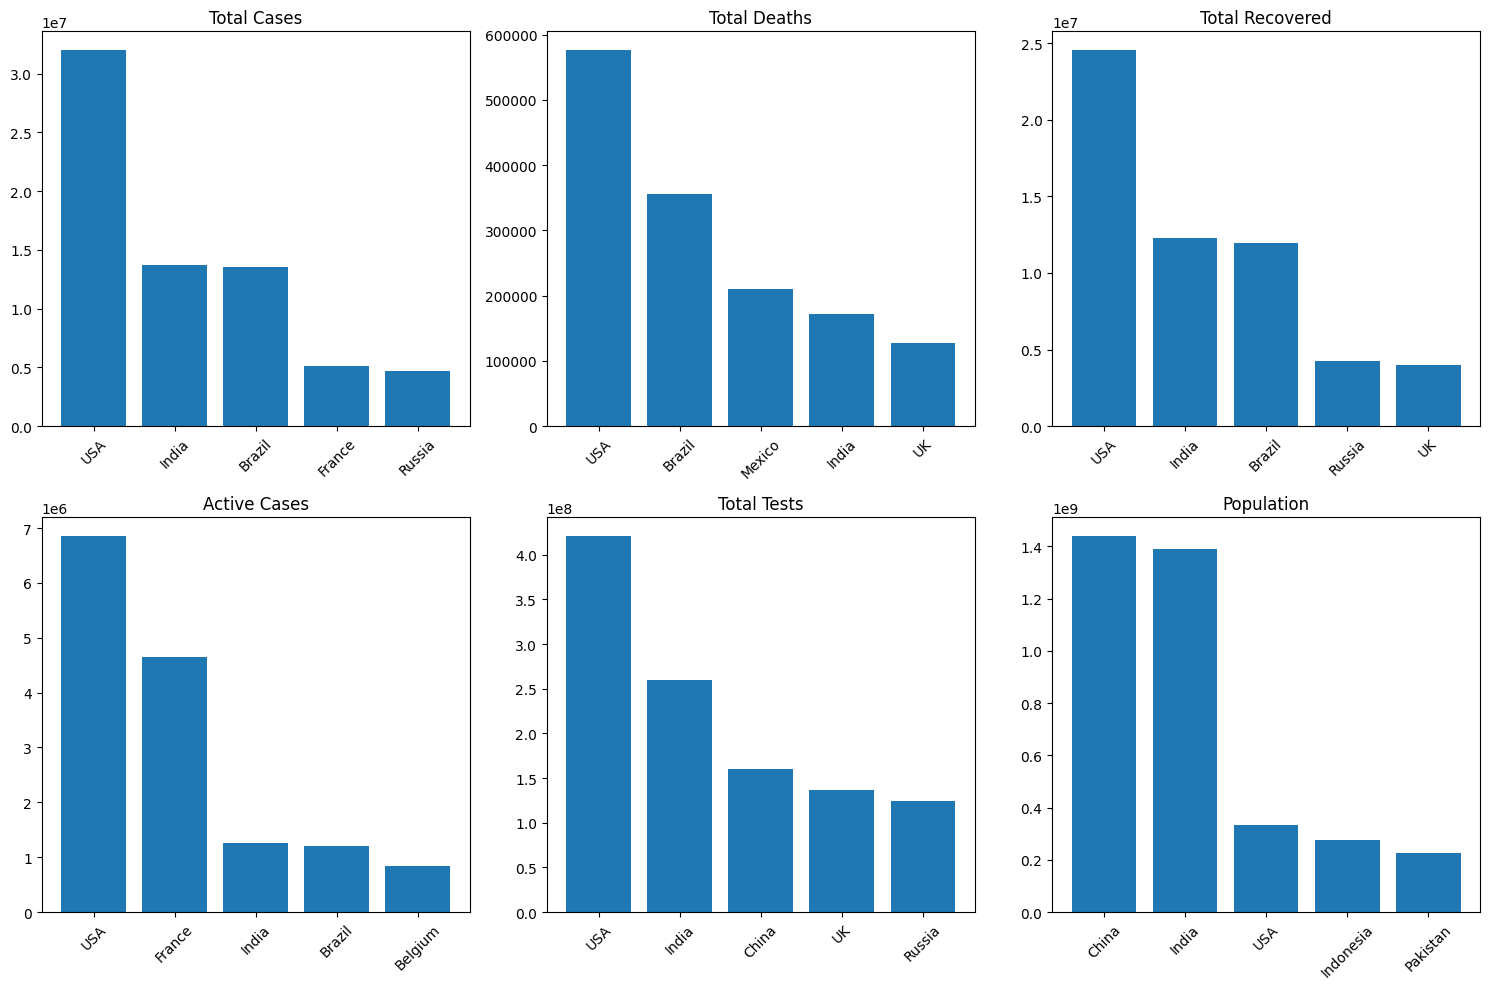

In [10]:
# TODO: draw 6 bar charts

columns_to_plot = ['Total Cases', 'Total Deaths',
                   'Total Recovered', 'Active Cases', 'Total Tests', 'Population']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for ax, col in zip(axs.flatten(), columns_to_plot):
    top_countries = df.sort_values(by=col, ascending=False).head(5)
    ax.bar(top_countries['Country Name'], top_countries[col])
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


# raise NotImplementedError('not implemented')

**TODO**: Comment about the chart

- `USA` has the highest number of total cases, total deaths, total recorvered, active cases, and total tests.
- `India` is the second highest in terms of total cases , total recovered, and total tests.
- `China`, despite having the largest population, is not in the top for any of the other catogaries.


### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which show the number of cases for each country. Specifically, you are provided a file named `coord.csv` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts


C:\Users\dhuu2\AppData\Local\Temp\ipykernel_11428\396848658.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


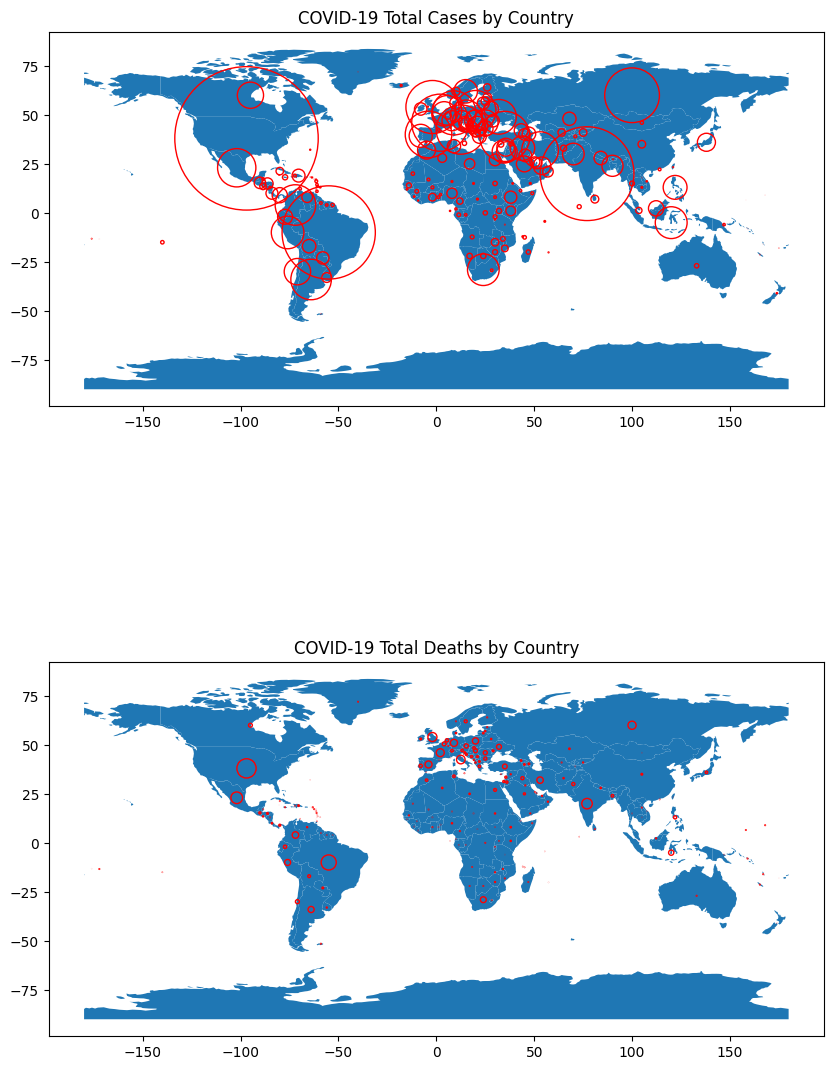

In [11]:


# Load the coordinates and the data
coords_json = pd.read_json('./data/coord.json')
coords = pd.DataFrame({
    'Country Name': coords_json.index,
    'latitude': coords_json['lat'],
    'longitude': coords_json['long']
})

data = pd.read_csv('./data/correct_data.csv')

# Merge the dataframes
df = pd.merge(data, coords, on='Country Name')

# Load a map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 15))

# Plot the world map on both subplots
world.plot(ax=ax[0])
world.plot(ax=ax[1])

# Plot the total cases on the first subplot
scatter_cases = ax[0].scatter(df['longitude'], df['latitude'],
                              s=df['Total Cases']/3000, edgecolors='red', alpha=1, facecolors='none', marker='o')  # changed color to edgecolors and added facecolors='none'
ax[0].set_title('COVID-19 Total Cases by Country')

# Plot the total deaths on the second subplot
scatter_deaths = ax[1].scatter(df['longitude'], df['latitude'],
                               s=df['Total Deaths']/3000, edgecolors='red', alpha=1, facecolors='none', marker='o')  # changed color to edgecolors and added facecolors='none'
ax[1].set_title('COVID-19 Total Deaths by Country')


# Show the plots
plt.show()

**TODO**: Comment about the chart

- `USA` has the highest number of total cases and deaths.
- `India` has the second highest number of total cases , while `Brazil` has the second highest number of deaths.


### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.


     Total Cases  Total Deaths
0       31990143      576298.0
1       13689453      171089.0
2       13521409      355031.0
3        5067216       99135.0
4        4657883      103601.0
..           ...           ...
193            4         763.0
194            3         763.0
195            3         763.0
196            1         763.0
197        90435        4636.0

[198 rows x 2 columns]
     Total Cases  Total Recovered
0       31990143       24560856.0
1       13689453       12253697.0
2       13521409       11957068.0
3        5067216         310934.0
4        4657883        4281776.0
..           ...              ...
193            4              4.0
194            3              2.0
195            3              1.0
196            1              1.0
197        90435          85506.0

[198 rows x 2 columns]
     Total Cases  Active Cases
0       31990143     6852989.0
1       13689453     1264667.0
2       13521409     1209310.0
3        5067216     4657147.0
4        4657883 

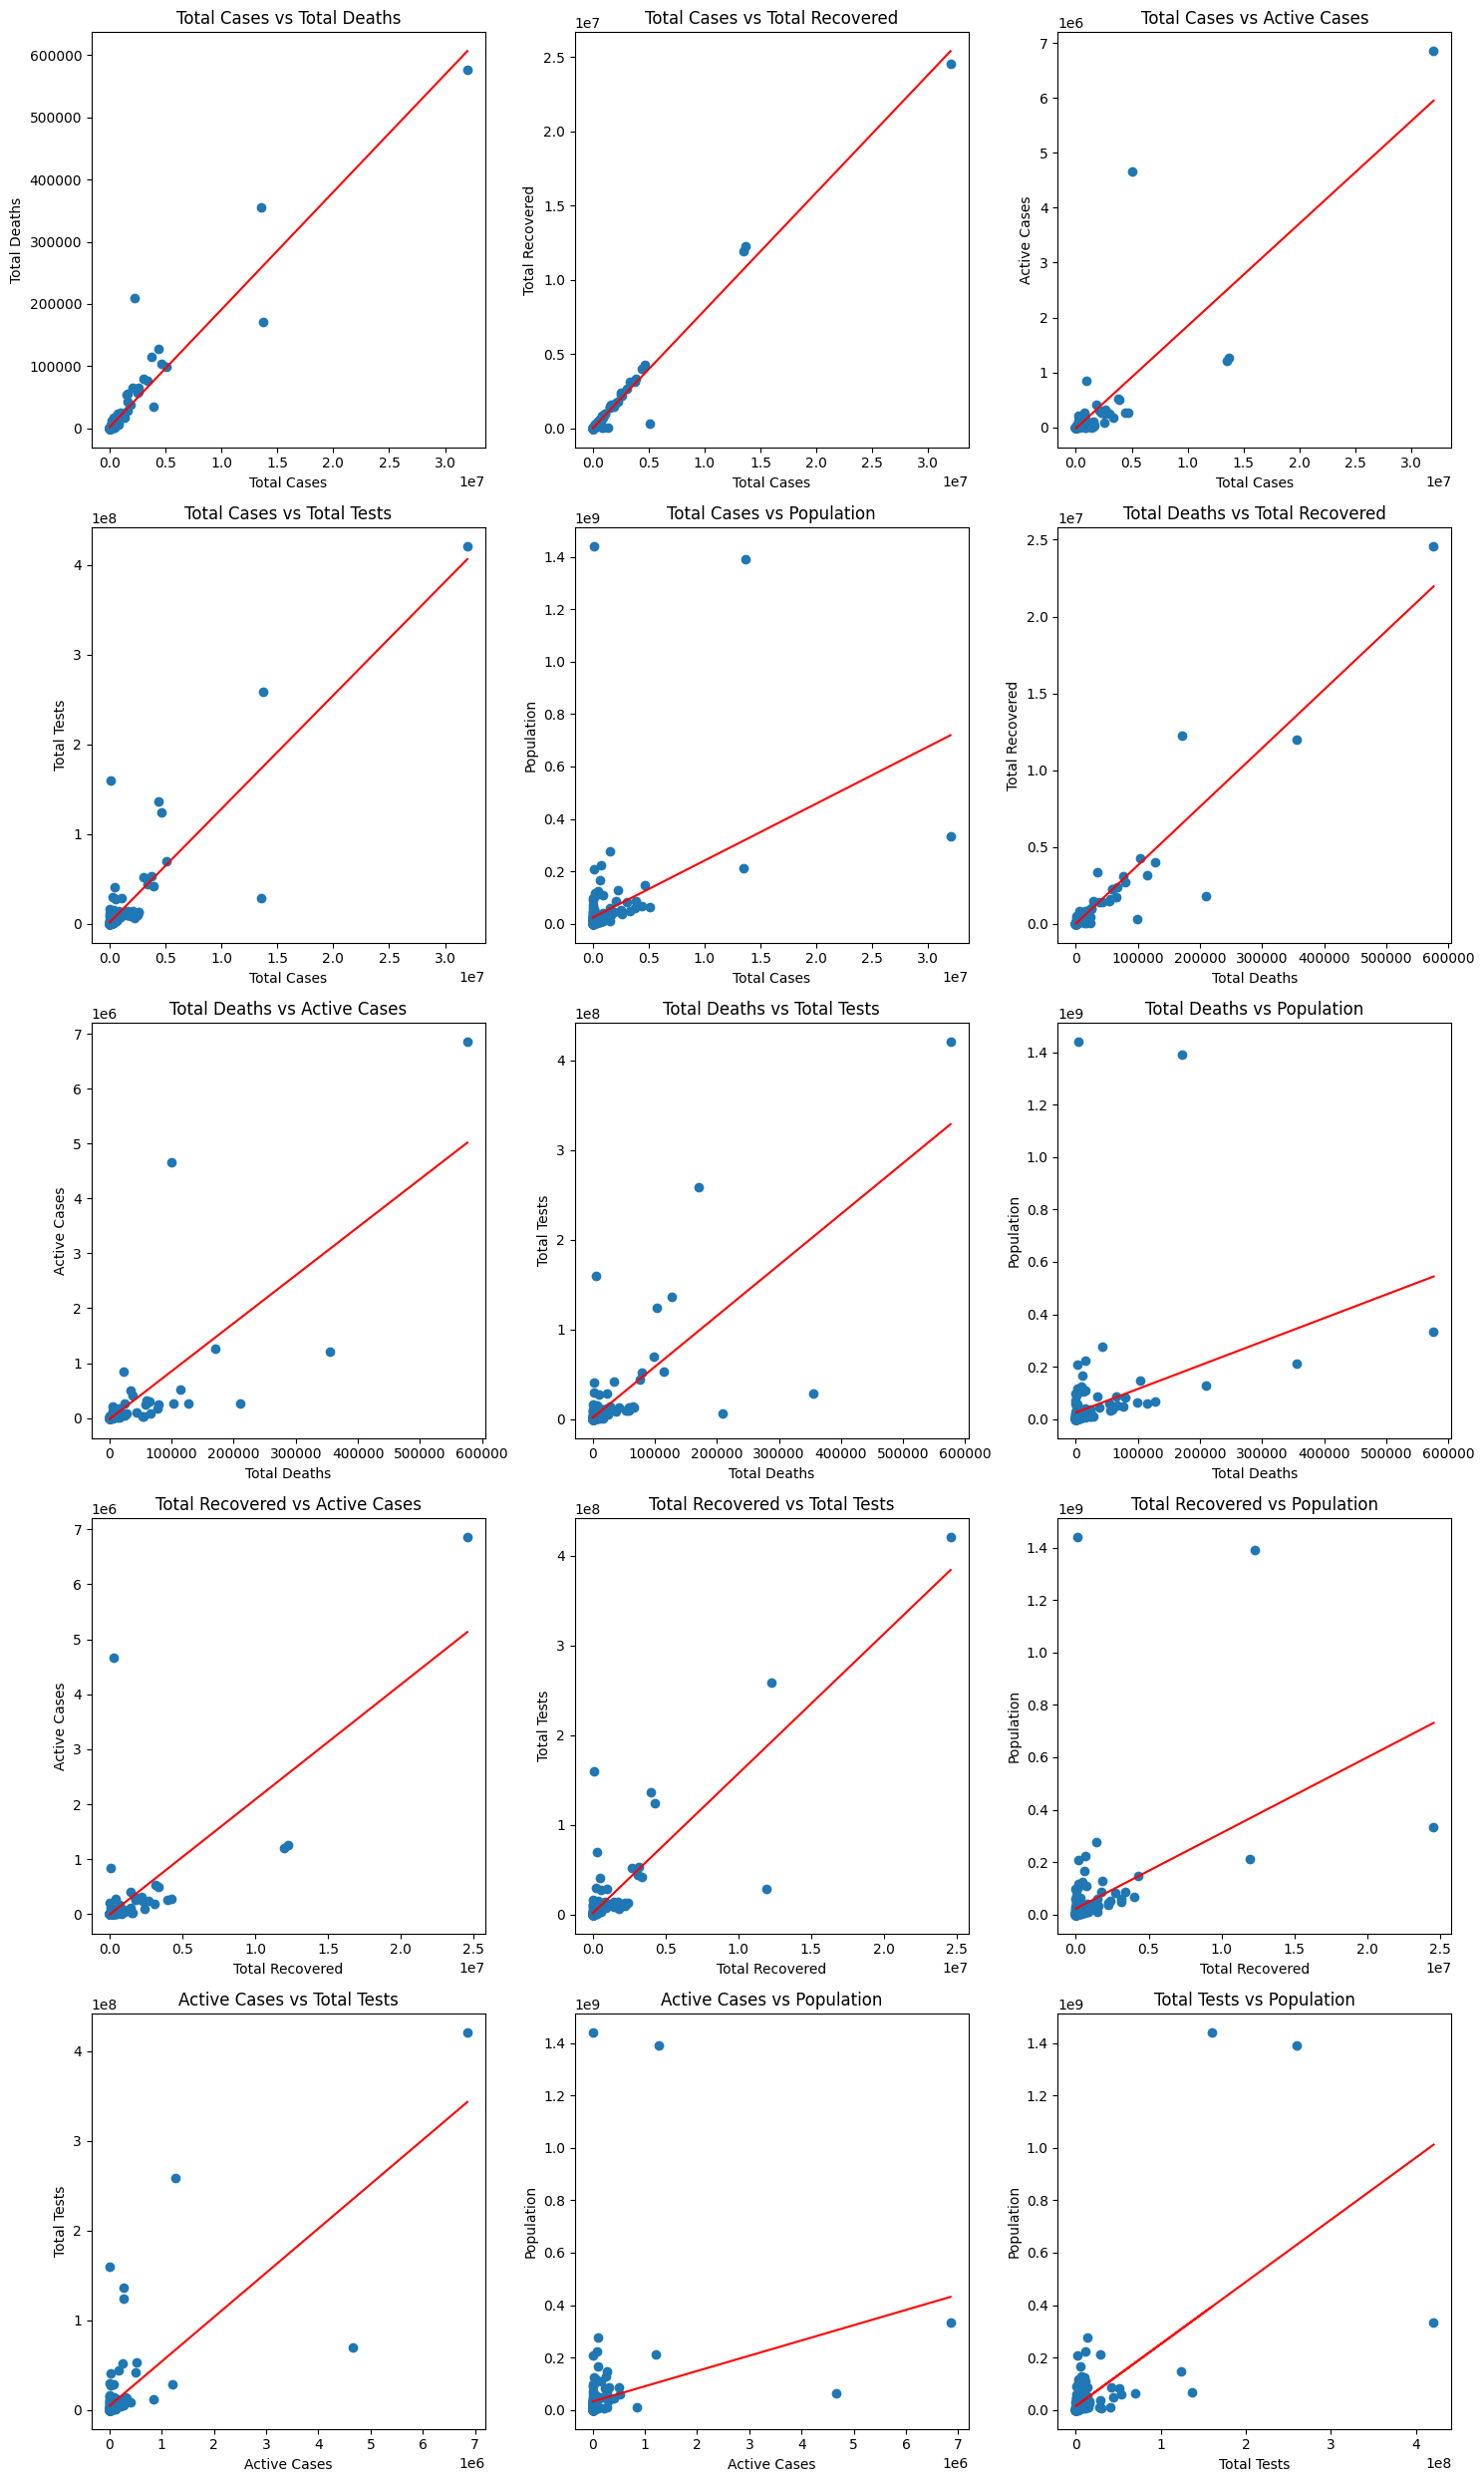

In [12]:
# TODO: scatter stuff

from itertools import combinations


variables = ['Total Cases', 'Total Deaths', 'Total Recovered',
             'Active Cases', 'Total Tests', 'Population']

# Get all combinations of variables
combinations = list(combinations(variables, 2))

# Create a 5x3 grid of subplots
fig, axs = plt.subplots(5, 3, figsize=(15, 25))

# For each pair of variables and subplot
for (var1, var2), ax in zip(combinations, axs.flatten()):
    # Create a scatter plot
    print(df[[var1, var2]])
    ax.scatter(df[var1], df[var2])

    # Calculate the line of best fit
    A = np.vstack([df[var1], np.ones(len(df[var1]))]).T
    m, c = np.linalg.lstsq(A, df[var2], rcond=None)[0]

    # Draw the line of best fit
    ax.plot(df[var1], m*df[var1] + c, 'r', label='Fitted line')

    # Set the title and labels
    ax.set_title(f'{var1} vs {var2}')
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)

# Show the plots
plt.tight_layout()
plt.show()

**TODO**: As showed above, give your prediction about the relationship between each pair.

1. Total Cases vs Total Deaths: There seems to be a positive correlation, indicating that countries with more total cases tend to have more total deaths.
2. Total Cases vs Total Recovered: There is a positive correlation, suggesting that as the total number of cases increases, the total number of recoveries also increases.
3. Total Cases vs Active Cases: There is a positive correlation, indicating that countries with more total cases tend to have more active cases.
4. Total Cases vs Total Tests: There is a positive correlation, suggesting that countries with more total cases tend to conduct more tests.
5. Total Cases vs Population: The correlation seems weak, indicating that the total number of cases does not necessarily depend on the population size.
6. Total Deaths vs Total Recovered: There is a positive correlation, suggesting that countries with more total deaths tend to have more recoveries.
7. Total Deaths vs Active Cases: There is a positive correlation, indicating that countries with more total deaths tend to have more active cases.
8. Total Deaths vs Total Tests: There is a positive correlation, suggesting that countries with more total deaths tend to conduct more tests.
9. Total Deaths vs Population: The correlation seems weak, indicating that the total number of deaths does not necessarily depend on the population size.
10. Total Recovered vs Active Cases: There is a positive correlation, suggesting that countries with more recoveries tend to have more active cases.
11. Total Recovered vs Total Tests: There is a positive correlation, indicating that countries with more recoveries tend to conduct more tests.
12. Total Recovered vs Population: The correlation seems weak, indicating that the total number of recoveries does not necessarily depend on the population size.
13. Active Cases vs Total Tests: There is a positive correlation, suggesting that countries with more active cases tend to conduct more tests.
14. Active Cases vs Population: The correlation seems weak, indicating that the number of active cases does not necessarily depend on the population size.
15. Total Tests vs Population: There is a positive correlation, indicating that countries with larger populations tend to conduct more tests.


### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap


c:\Users\dhuu2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


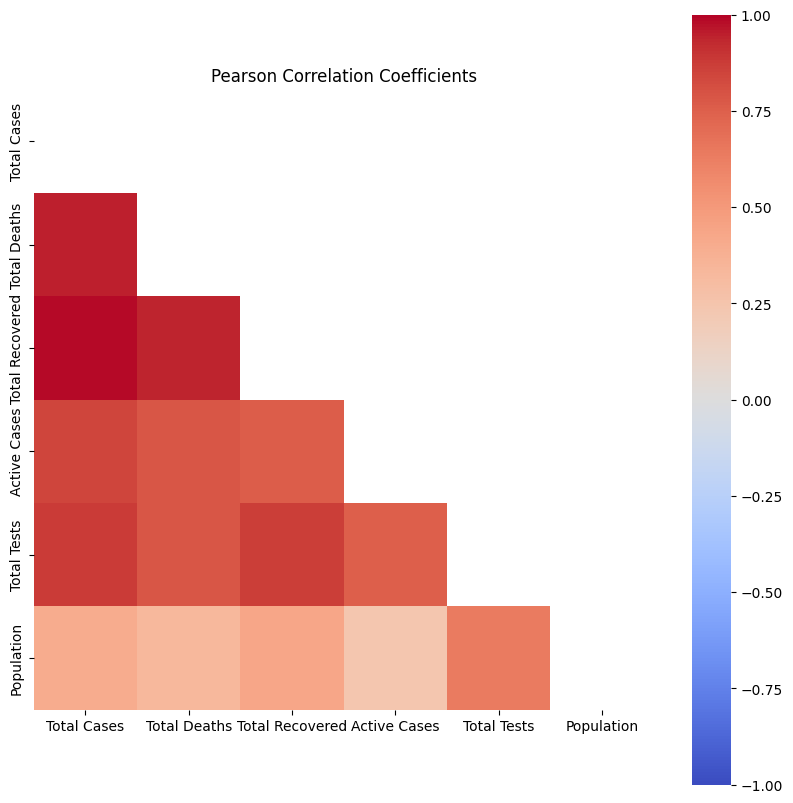

In [13]:
# TODO: create heatamp
import seaborn as sns


# Calculate the Pearson correlation coefficients
correlation_matrix = df[variables].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True,
            cmap='coolwarm', square=True, vmin=-1, vmax=1)

# Set the title
plt.title('Pearson Correlation Coefficients')

# Show the plot
plt.show()
# raise NotImplementedError('not implemented')

For now, you can check whether your prediction is right or wrong!


## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:

  1. Prepare data for training and testing
  2. Create a model
  3. Train and test the model
  4. Visualize the result

- You are required to:

  1. Study Multi-layer neural network and Convolutional neural network
  2. Study `Pytorch` in order to prepare data and design machine learning model
  3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
     - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
     - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster


### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader

`DataLoader` provide the ability to batch, shuffle and load the data in parallel using multiprocessing workers.They are essential for efficient trainning of machine learning models.

...


In [14]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32

import torchvision
import torchvision.transforms as transforms

# Define a transform to convert the data into tensors
transform = transforms.ToTensor()

# Download the MNIST training and testing datasets and apply the transform
train_data = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform)

# Create data loaders for training and testing
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.


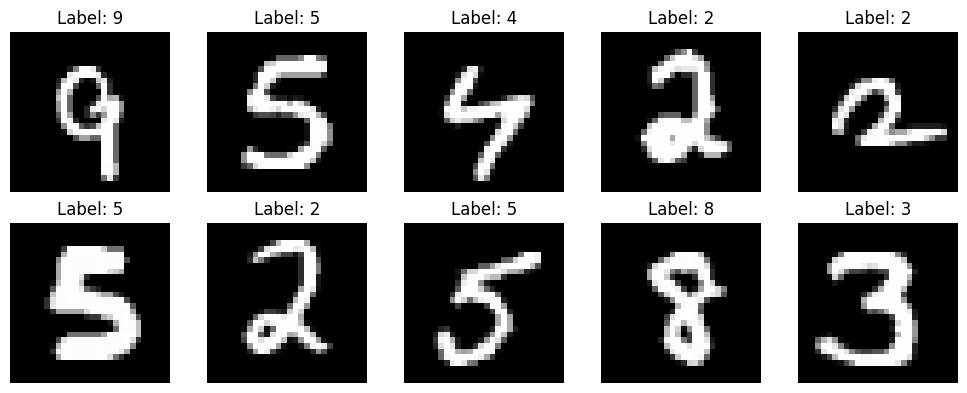

In [15]:
# Get 10 random indices
indices = np.random.choice(len(train_data), size=10, replace=False)

# Create a figure
plt.figure(figsize=(10, 4))

# Plot the 10 random samples
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_data[idx][0].squeeze(), cmap='gray')
    plt.title(f"Label: {train_data[idx][1]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells


In [16]:

import torch.nn.functional as F

# FC model

class Mnist_FC(nn.Module):
    def __init__(self):
        super(Mnist_FC, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# CNN model


class Mnist_CNN(nn.Module):
    def __init__(self):
        super(Mnist_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(20, 20, 5)
        self.fc1 = nn.Linear(20 * 4 * 4, 10)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 20 * 4 * 4)
        x = self.fc1(x)
        x = self.logsoftmax(x)
        return x

### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell

  - `train` function trains the model with all the data in training set
  - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

The `train` function has the following parameters:

- `dataloader`: This is the data loader object that provides batches of data for training the model.
- `model`: This is the model that we are training.
- `loss_fn`: This is the loss function that we are using to calculate the prediction error.
- `optimizer`: This is the optimizer that we are using to update the model parameters.

The `test` function has the following parameters:

- `dataloader`: This is the data loader object that provides batches of data for testing the model.
- `model`: This is the model that we are testing.

The line `with torch.no_grad():` is used to disable gradient calculation. During testing, we don't need to compute gradients, as we are not updating the model parameters. Disabling gradient calculation reduces memory usage and speeds up computation.

...


In [17]:

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    accuracy = correct / size
    return accuracy

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

Loss Functions:

1. Mean Squared Error (MSE)
2. Cross-Entropy Loss
3. Binary Cross-Entropy Loss

Optimizers:

1. Stochastic Gradient Descent (SGD)
2. RMSprop
3. Adam

...


In [18]:
# TODO: run 20 epochs for Mnist_FC and Mnist_CNN
# Define the models
model_fc = Mnist_FC().to(device)
model_cnn = Mnist_CNN().to(device)

# Define the loss function and optimizer
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer_fc = torch.optim.SGD(model_fc.parameters(), lr=learning_rate)
optimizer_cnn = torch.optim.SGD(model_cnn.parameters(), lr=learning_rate)

# Initialize history dictionaries
history_fc = {}
history_cnn = {}


# Train and test the models for 20 epochs
print("========== FC model ==========")
for epoch in range(1, 21):
    print(f"Epoch {epoch}\n-------------------------------")
    train(train_loader, model_fc, loss_fn, optimizer_fc)
    train_acc = test(train_loader, model_fc)
    test_acc = test(test_loader, model_fc)
    history_fc[epoch] = [train_acc, test_acc]
    print(f"Training acc: {train_acc:.3f}\nTesting acc: {test_acc:.3f}\n")

print("========== CNN model ==========")
for epoch in range(1, 21):
    print(f"Epoch {epoch}\n-------------------------------")
    train(train_loader, model_cnn, loss_fn, optimizer_cnn)
    train_acc = test(train_loader, model_cnn)
    test_acc = test(test_loader, model_cnn)
    history_cnn[epoch] = [train_acc, test_acc]
    print(f"Training acc: {train_acc:.3f}\nTesting acc: {test_acc:.3f}\n")

========== FC model ==========
Epoch 1
-------------------------------


Training acc: 0.633
Testing acc: 0.639

Epoch 2
-------------------------------
Training acc: 0.700
Testing acc: 0.706

Epoch 3
-------------------------------
Training acc: 0.765
Testing acc: 0.773

Epoch 4
-------------------------------
Training acc: 0.817
Testing acc: 0.823

Epoch 5
-------------------------------
Training acc: 0.843
Testing acc: 0.850

Epoch 6
-------------------------------
Training acc: 0.861
Testing acc: 0.866

Epoch 7
-------------------------------
Training acc: 0.873
Testing acc: 0.877

Epoch 8
-------------------------------
Training acc: 0.881
Testing acc: 0.886

Epoch 9
-------------------------------
Training acc: 0.887
Testing acc: 0.893

Epoch 10
-------------------------------
Training acc: 0.892
Testing acc: 0.896

Epoch 11
-------------------------------
Training acc: 0.895
Testing acc: 0.901

Epoch 12
-------------------------------
Training acc: 0.899
Testing acc: 0.903

Epoch 13
-------------------------------
Training acc: 0.902
Testing acc: 0.9

### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

The CNN model starts with a higher accuracy in the first epoch and maintains this lead throughout the training process.

By the 20th epoch, the CNN model achieves a testing accuracy of 97.0%, while the FC model reaches a testing accuracy of 91.8%. This demonstrates the effectiveness of CNNs for image classification tasks.

...


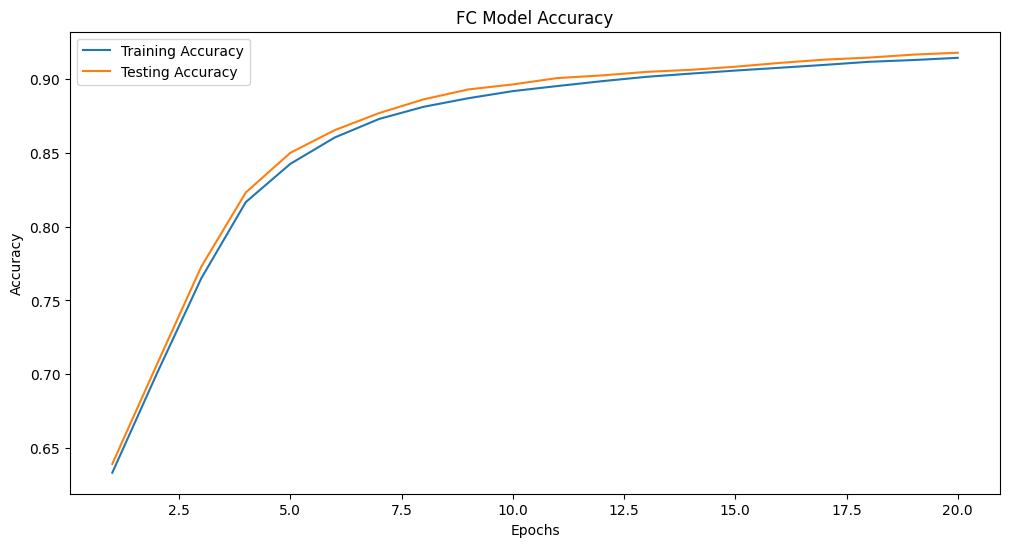

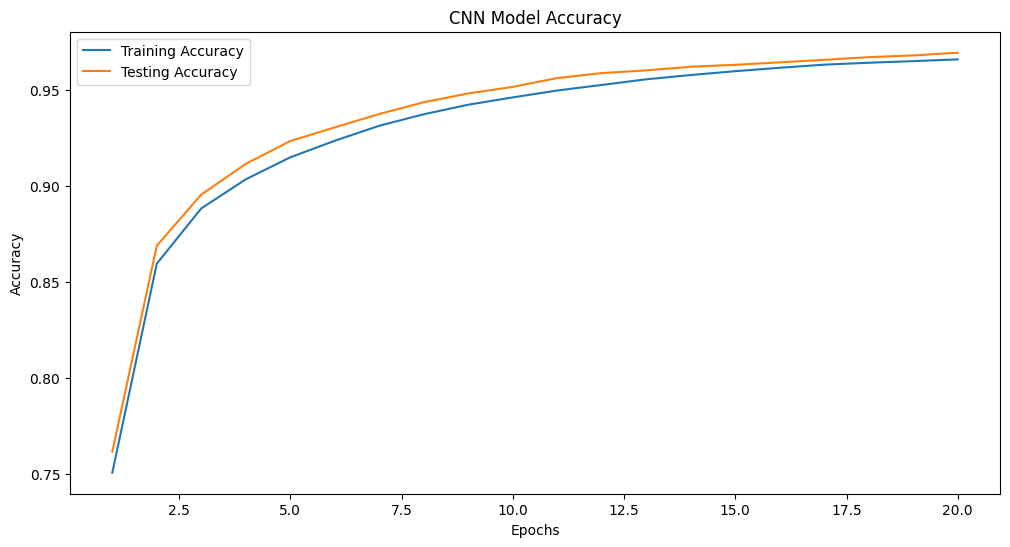

In [19]:
# TODO: visualize the history
# Plot the accuracy of the two models

# Plot the accuracy of the FC model
plt.figure(figsize=(12, 6))  # Set the figure size

plt.plot(list(history_fc.keys()), [
         val[0] for val in history_fc.values()], label='Training Accuracy')
plt.plot(list(history_fc.keys()), [
         val[1] for val in history_fc.values()], label='Testing Accuracy')
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  
plt.title('FC Model Accuracy')  
plt.legend()  
plt.show()  


plt.figure(figsize=(12, 6))  

plt.plot(list(history_cnn.keys()), [
         val[0] for val in history_cnn.values()], label='Training Accuracy')
plt.plot(list(history_cnn.keys()), [
         val[1] for val in history_cnn.values()], label='Testing Accuracy')
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  
plt.title('CNN Model Accuracy')  
plt.legend()  
plt.show()

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` using Colab
